Automatically created module for IPython interactive environment


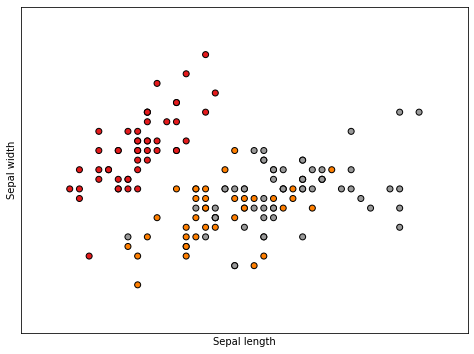

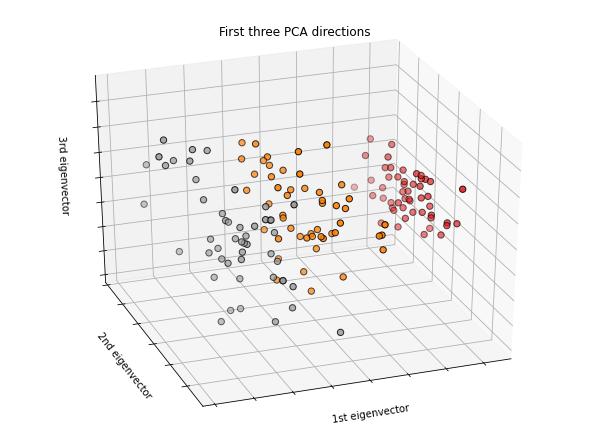

In [3]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
#print(iris)
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
datainput = data1[['sepal length (cm)', 'sepal width (cm)', 'target']]
print(data1.columns)
class0 = datainput.loc[datainput['target']== 0]
class1 = datainput.loc[datainput['target']== 1]
#class2 = datainput.loc[datainput['target']== 2]
print (class1.head())
print (class0.head())
points0 = class0[['sepal length (cm)', 'sepal width (cm)']].to_numpy()
points1=class1[['sepal length (cm)', 'sepal width (cm)']].to_numpy()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
    sepal length (cm)  sepal width (cm)  target
50                7.0               3.2     1.0
51                6.4               3.2     1.0
52                6.9               3.1     1.0
53                5.5               2.3     1.0
54                6.5               2.8     1.0
   sepal length (cm)  sepal width (cm)  target
0                5.1               3.5     0.0
1                4.9               3.0     0.0
2                4.7               3.2     0.0
3                4.6               3.1     0.0
4                5.0               3.6     0.0


In [5]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
stretchCoef = 1.2
#points = np.random.rand(30, 2)   # 30 random points in 2-D
#points2 = np.random.rand(20, 2)   # 30 random points in 2-D
hull = ConvexHull(points0[:, [0, 1]])
hull1 = ConvexHull(points1[:, [0, 1]])
#print(hull.simplices*2)

5.1625 3.5875000000000004


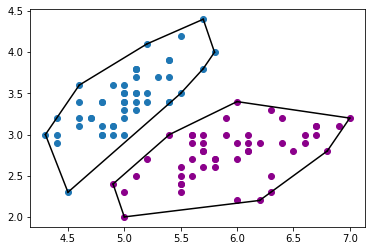

In [6]:
import matplotlib.pyplot as plt
plt.scatter(points0[:,0], points0[:,1])
plt.scatter(points1[:,0], points1[:,1], c='darkmagenta')

for simplex in hull.simplices:
    plt.plot(points0[simplex, 0], points0[simplex, 1], 'k-')
for simplex in hull1.simplices:
    plt.plot(points1[simplex, 0], points1[simplex, 1], 'k-')
cx = np.mean(hull.points[hull.vertices,0])
cy = np.mean(hull.points[hull.vertices,1])
cx1 = np.mean(hull1.points[hull.vertices,0])
cy1 = np.mean(hull1.points[hull.vertices,1])
print(cx,cy)

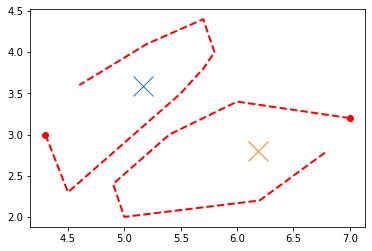

In [8]:
plt.plot(points0[hull.vertices,0], points0[hull.vertices,1], 'r--', lw=2)
plt.plot(points0[hull.vertices[0],0], points0[hull.vertices[0],1], 'ro')

plt.plot(points1[hull1.vertices,0], points1[hull1.vertices,1], 'r--', lw=2)
plt.plot(points1[hull1.vertices[0],0], points1[hull1.vertices[0],1], 'ro')

plt.plot(cx, cy,'x',ms=20)
plt.plot(cx1, cy1,'x',ms=20)
plt.show()


Scaling the convex hull

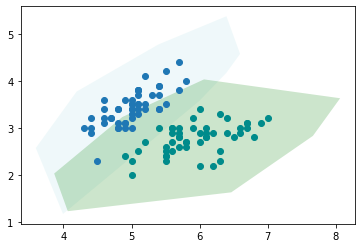

In [67]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#points = np.random.rand(30, 2)   # 30 random points in 2-D
#hull = ConvexHull(points)

plt.plot(points0[:,0], points0[:,1], 'o')

cent = np.mean(points0, 0)
pts = []
for pt in points0[hull.simplices]:
    pts.append(pt[0].tolist())
    pts.append(pt[1].tolist())

pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                p[0] - cent[0]))
pts = pts[0::2]  # Deleting duplicates
pts.insert(len(pts), pts[0])
k = 2 # the scaling factor, change iteratively until areas overlap
color = 'powderblue'
poly = Polygon(k*(np.array(pts) - cent) + cent,
               facecolor=color, alpha=0.2)
poly.set_capstyle('round')
plt.gca().add_patch(poly)

#Make it dynamic in loop for each hull in data for project input
# Hull 2  Begins 
plt.plot(points1[:,0], points1[:,1], 'o', color = 'darkcyan')

cent1 = np.mean(points1, 0)
pts1 = []
for pt in points1[hull1.simplices]:
    pts1.append(pt[0].tolist())
    pts1.append(pt[1].tolist())

pts1.sort(key=lambda p: np.arctan2(p[1] - cent1[1],
                                p[0] - cent1[0]))
pts1 = pts1[0::2]  # Deleting duplicates
pts1.insert(len(pts1), pts1[0])
#k = 1.1
color = 'green'
poly1 = Polygon(k*(np.array(pts1) - cent1) + cent1,
               facecolor=color, alpha=0.2)
poly1.set_capstyle('round')
plt.gca().add_patch(poly1)
#plt.savefig('convex.png')

1.7838497058823541


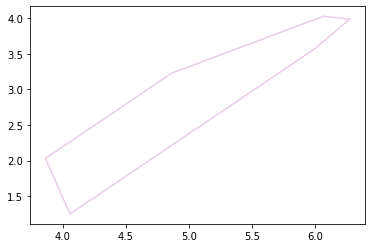

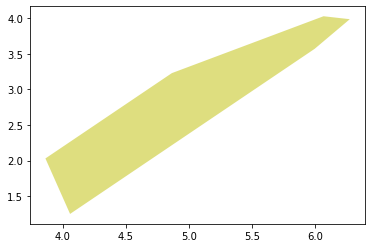

CLass 0:

found 1: [4.9 3. ]
found 1: [4.9 3.1]
found 1: [4.8 3. ]
found 1: [5.4 3.4]
found 1: [5.1 3.3]
found 1: [5. 3.]
found 1: [5.2 3.4]
found 1: [4.8 3.1]
found 1: [5.4 3.4]
found 1: [4.9 3.1]
found 1: [5.  3.2]
found 1: [5.5 3.5]
found 1: [4.5 2.3]
found 1: [4.8 3. ]
found 1: [5.  3.3]
CLass 1:

found 1: [4.9 2.4]
found 1: [5.2 2.7]
found 1: [5.4 3. ]
found 1: [5.1 2.5]


In [96]:
from shapely.geometry  import Point, Polygon

p = Polygon(poly.get_xy())
q = Polygon(poly1.get_xy())
#print(p.intersects(q))  # True
if(p.intersects(q)):
    print(p.intersection(q).area)  # 1.0
    x = p.intersection(q)
    x,y = x.exterior.xy
    plt.plot(*overlaparea.exterior.xy,c='darkmagenta', alpha=0.2)
   
    fig, axs = plt.subplots()   
    axs.fill(*overlaparea.exterior.xy, alpha=0.5, fc='y', ec='none')
    plt.show()     
    #print (x)
    #print (y)
    #plt.plot(x,y)
    x_list=x.tolist()
    y_list=y.tolist()
    a = np.array(x_list)
    b = np.array(y_list)
    arr_2d = np.concatenate([a[:,None],b[:,None]], axis=1)
    #print (arr_2d)
    overlaparea = Polygon(arr_2d)
    print("CLass 0:\n")
    for point in points0:
        Ptin=Point(point[0],point[1])    
        #print(overlaparea.contains(Ptin) , Ptin.within(overlaparea) )
        if(Ptin.within(overlaparea)):
            print("found 1:",point )
    print("CLass 1:\n")
    for point in points1:
        Ptin1=Point(point[0],point[1])    
        if(Ptin1.within(overlaparea)):
            print("found 1:",point )
else:
    print("No intersection")
    

